In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dtype warning for columns (12,18,24,25,26,27,29,47,60)
dtype_columns = {"Level":float, "CS in Team's Jungle":float, "Vision Score":float, "Wards placed":float, "Wards destroyed":float, "Control Wards Purchased":float, "VSPM":float, "GD@15":float, "Total damage taken":float}

In [3]:
# stops pandas from interpreting NA (the region) as missing value NaN
df = pd.read_csv("combined_match_stats.csv", keep_default_na=False,na_values=[""],low_memory=False)

In [4]:
df.head()

,GameID,Team,Result,Game Time,Side,Patch,Tournament,Date,Region,Champion,...,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Ksante,...,NaN,NaN,NaN,NaN,26434.7,NaN,NaN,NaN,NaN,NaN
1,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Viego,...,NaN,NaN,NaN,NaN,42723.7,NaN,NaN,NaN,NaN,NaN
2,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Aurora,...,NaN,NaN,NaN,NaN,16880.7,NaN,NaN,NaN,NaN,NaN
3,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Ashe,...,NaN,NaN,NaN,NaN,15290.8,NaN,NaN,NaN,NaN,NaN
4,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Braum,...,NaN,NaN,NaN,NaN,17962.1,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.columns.tolist())

['GameID', 'Team', 'Result', 'Game Time', 'Side', 'Patch', 'Tournament', 'Date', 'Region', 'Champion', 'Player', 'Role', 'Level', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS', "CS in Team's Jungle", 'CS in Enemy Jungle', 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score', 'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'Detector Wards Placed', 'VSPM', 'WPM', 'VWPM', 'WCPM', 'VS%', 'Total damage to Champion', 'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%', 'K+A Per Minute', 'KP%', 'Solo kills', 'Double kills', 'Triple kills', 'Quadra kills', 'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15', 'Objectives Stolen', 'Damage dealt to turrets', 'Damage dealt to buildings', 'Total heal', 'Total Heals On Teammates', 'Damage self mitigated', 'Total Damage Shielded On Teammates', 'Time ccing others', 'Total Time CC Dealt', 'Total damage taken', 'Total Time Spent Dead', 'Consumables purchased', 'Items Purchased', 'Shutdown bounty collected', 'Shutdown bounty lost']


In [6]:
print(df.columns[[12, 18, 24, 25, 26, 27, 29, 47, 60]])

Index(['Level', 'CS in Team's Jungle', 'Vision Score', 'Wards placed',
       'Wards destroyed', 'Control Wards Purchased', 'VSPM', 'GD@15',
       'Total damage taken'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22600 entries, 0 to 22599
Data columns (total 66 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GameID                              22600 non-null  int64  
 1   Team                                22600 non-null  object 
 2   Result                              22600 non-null  object 
 3   Game Time                           22600 non-null  object 
 4   Side                                22600 non-null  object 
 5   Patch                               22600 non-null  object 
 6   Tournament                          22600 non-null  object 
 7   Date                                22600 non-null  object 
 8   Region                              22600 non-null  object 
 9   Champion                            22600 non-null  object 
 10  Player                              22600 non-null  object 
 11  Role                                22600

In [8]:
df = df[df["GameID"] != 63197]

In [9]:
df.isnull().sum()

GameID                          0
Team                            0
Result                          0
Game Time                       0
Side                            0
                             ... 
Total Time Spent Dead        8050
Consumables purchased        8050
Items Purchased              8050
Shutdown bounty collected    8050
Shutdown bounty lost         8050
Length: 66, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22590 entries, 0 to 22599
Data columns (total 66 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GameID                              22590 non-null  int64  
 1   Team                                22590 non-null  object 
 2   Result                              22590 non-null  object 
 3   Game Time                           22590 non-null  object 
 4   Side                                22590 non-null  object 
 5   Patch                               22590 non-null  object 
 6   Tournament                          22590 non-null  object 
 7   Date                                22590 non-null  object 
 8   Region                              22590 non-null  object 
 9   Champion                            22590 non-null  object 
 10  Player                              22590 non-null  object 
 11  Role                                22590 non-

In [11]:
df = df.dropna(axis=1)

In [12]:
df.head()

,GameID,Team,Result,Game Time,Side,Patch,Tournament,Date,Region,Champion,...,Total damage to Champion,Physical Damage,Magic Damage,True Damage,DPM,DMG%,K+A Per Minute,KP%,GD@15,Total damage taken
0,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Ksante,...,9830.40,7914.28,1012.28,903.84,278,12.4%,0.20,41.2%,-600.0,26434.7
1,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Viego,...,10013.26,8758.59,1070.67,184.00,283,12.6%,0.25,52.9%,528.0,42723.7
2,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Aurora,...,37571.06,1077.96,35183.30,1309.80,1062,47.4%,0.37,76.5%,1072.0,16880.7
3,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Ashe,...,15603.29,14094.30,1508.99,0.00,441,19.7%,0.25,52.9%,-199.0,15290.8
4,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Braum,...,6292.02,465.85,5826.17,0.00,178,7.9%,0.34,70.6%,250.0,17962.1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22590 entries, 0 to 22599
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GameID                    22590 non-null  int64  
 1   Team                      22590 non-null  object 
 2   Result                    22590 non-null  object 
 3   Game Time                 22590 non-null  object 
 4   Side                      22590 non-null  object 
 5   Patch                     22590 non-null  object 
 6   Tournament                22590 non-null  object 
 7   Date                      22590 non-null  object 
 8   Region                    22590 non-null  object 
 9   Champion                  22590 non-null  object 
 10  Player                    22590 non-null  object 
 11  Role                      22590 non-null  object 
 12  Level                     22590 non-null  float64
 13  Kills                     22590 non-null  int64  
 14  Deaths     

In [14]:
df = df.drop(["KDA","CS in Team's Jungle", "CSM", "Physical Damage", "Magic Damage", "True Damage", "Total damage taken", "Total damage to Champion", "CS", "Vision Score", "Wards placed", "Wards destroyed", "Control Wards Purchased", "VSPM", "WPM", "WCPM", "VWPM" ], axis = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22590 entries, 0 to 22599
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GameID          22590 non-null  int64  
 1   Team            22590 non-null  object 
 2   Result          22590 non-null  object 
 3   Game Time       22590 non-null  object 
 4   Side            22590 non-null  object 
 5   Patch           22590 non-null  object 
 6   Tournament      22590 non-null  object 
 7   Date            22590 non-null  object 
 8   Region          22590 non-null  object 
 9   Champion        22590 non-null  object 
 10  Player          22590 non-null  object 
 11  Role            22590 non-null  object 
 12  Level           22590 non-null  float64
 13  Kills           22590 non-null  int64  
 14  Deaths          22590 non-null  int64  
 15  Assists         22590 non-null  int64  
 16  Golds           22590 non-null  int64  
 17  GPM             22590 non-null  int6

In [16]:
df["Result"] = df["Result"].map({"WIN": 1, "LOSS": 0})

In [17]:
df["Patch"] = df["Patch"].str.lstrip("v").astype(float)

In [18]:
df["Side"] = df["Side"].map({"Blue": 1, "Red":  0})

In [19]:
df["Game Time"] = pd.to_timedelta("00:" + df["Game Time"])
df["Game Time"] = pd.to_timedelta(df["Game Time"]).dt.total_seconds()

In [20]:
df["KP%"] = (df["KP%"].str.rstrip("%").astype(float)/100).round(3)
df["GOLD%"] = (df["GOLD%"].str.rstrip("%").astype(float)/100).round(3)
df["VS%"] = (df["VS%"].str.rstrip("%").astype(float)/100).round(3)
df["DMG%"] = (df["DMG%"].str.rstrip("%").astype(float)/100).round(3)

In [21]:
numerical_cols = df.select_dtypes(include=["number"]).columns
correlation_matrix = df[numerical_cols].corr()

In [22]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
correlation_matrix

,GameID,Result,Game Time,Side,Patch,Level,Kills,Deaths,Assists,Golds,GPM,GOLD%,VS%,DPM,DMG%,K+A Per Minute,KP%,GD@15
GameID,1.000000e+00,-2.784695e-15,-1.253638e-02,-1.915291e-16,-3.255418e-01,0.025424,0.015023,0.020756,0.047418,0.008580,0.019854,-0.000013,-0.000021,0.022030,0.000017,0.052410,0.040011,1.627552e-17
Result,-2.784695e-15,1.000000e+00,1.955786e-17,5.710491e-02,6.998575e-16,0.314124,0.390959,-0.544200,0.584755,0.310550,0.399368,-0.000018,0.000016,0.220564,0.000041,0.692401,0.111368,2.972756e-01
Game Time,-1.253638e-02,1.955786e-17,1.000000e+00,-3.353297e-17,-6.062307e-04,0.490913,0.121096,0.168724,0.205615,0.571668,-0.008855,-0.000037,-0.000003,0.103230,0.000004,-0.046552,0.084500,-1.994123e-18
Side,-1.915291e-16,5.710491e-02,-3.353297e-17,1.000000e+00,-5.093892e-16,0.016616,0.019956,-0.027606,0.029422,0.020362,0.027687,-0.000056,0.000033,0.023573,-0.000016,0.036947,0.009489,4.424533e-02
Patch,-3.255418e-01,6.998575e-16,-6.062307e-04,-5.093892e-16,1.000000e+00,0.012276,0.002957,0.003845,-0.016715,-0.000867,-0.000830,0.000063,0.000005,-0.008295,-0.000009,-0.013451,-0.033127,-2.874516e-17
Level,2.542418e-02,3.141242e-01,4.909126e-01,1.661624e-02,1.227640e-02,1.000000,0.491513,-0.284488,0.091955,0.860053,0.720376,0.641661,-0.688830,0.611373,0.548246,0.185820,-0.049586,1.442175e-01
Kills,1.502317e-02,3.909593e-01,1.210964e-01,1.995616e-02,2.956767e-03,0.491513,1.000000,-0.275127,0.100532,0.686740,0.758085,0.597671,-0.366450,0.657705,0.500115,0.533788,0.201247,3.430629e-01
Deaths,2.075571e-02,-5.442002e-01,1.687239e-01,-2.760616e-02,3.845214e-03,-0.284488,-0.275127,1.000000,-0.171866,-0.250485,-0.437404,-0.247426,0.161175,-0.224468,-0.202921,-0.345085,-0.084964,-2.914851e-01
Assists,4.741840e-02,5.847554e-01,2.056153e-01,2.942200e-02,-1.671470e-02,0.091955,0.100532,-0.171866,1.000000,0.086252,-0.017729,-0.343050,0.318585,-0.000028,-0.269982,0.837828,0.417072,1.854932e-01
Golds,8.579665e-03,3.105501e-01,5.716676e-01,2.036230e-02,-8.666609e-04,0.860053,0.686740,-0.250485,0.086252,1.000000,0.805246,0.728719,-0.578453,0.696541,0.601593,0.247746,0.070986,2.159557e-01


array([[<Axes: title={'center': 'GameID'}>,
        <Axes: title={'center': 'Result'}>,
        <Axes: title={'center': 'Game Time'}>,
        <Axes: title={'center': 'Side'}>],
       [<Axes: title={'center': 'Patch'}>,
        <Axes: title={'center': 'Level'}>,
        <Axes: title={'center': 'Kills'}>,
        <Axes: title={'center': 'Deaths'}>],
       [<Axes: title={'center': 'Assists'}>,
        <Axes: title={'center': 'Golds'}>,
        <Axes: title={'center': 'GPM'}>,
        <Axes: title={'center': 'GOLD%'}>],
       [<Axes: title={'center': 'VS%'}>, <Axes: title={'center': 'DPM'}>,
        <Axes: title={'center': 'DMG%'}>,
        <Axes: title={'center': 'K+A Per Minute'}>],
       [<Axes: title={'center': 'KP%'}>,
        <Axes: title={'center': 'GD@15'}>, <Axes: >, <Axes: >]],
      dtype=object)

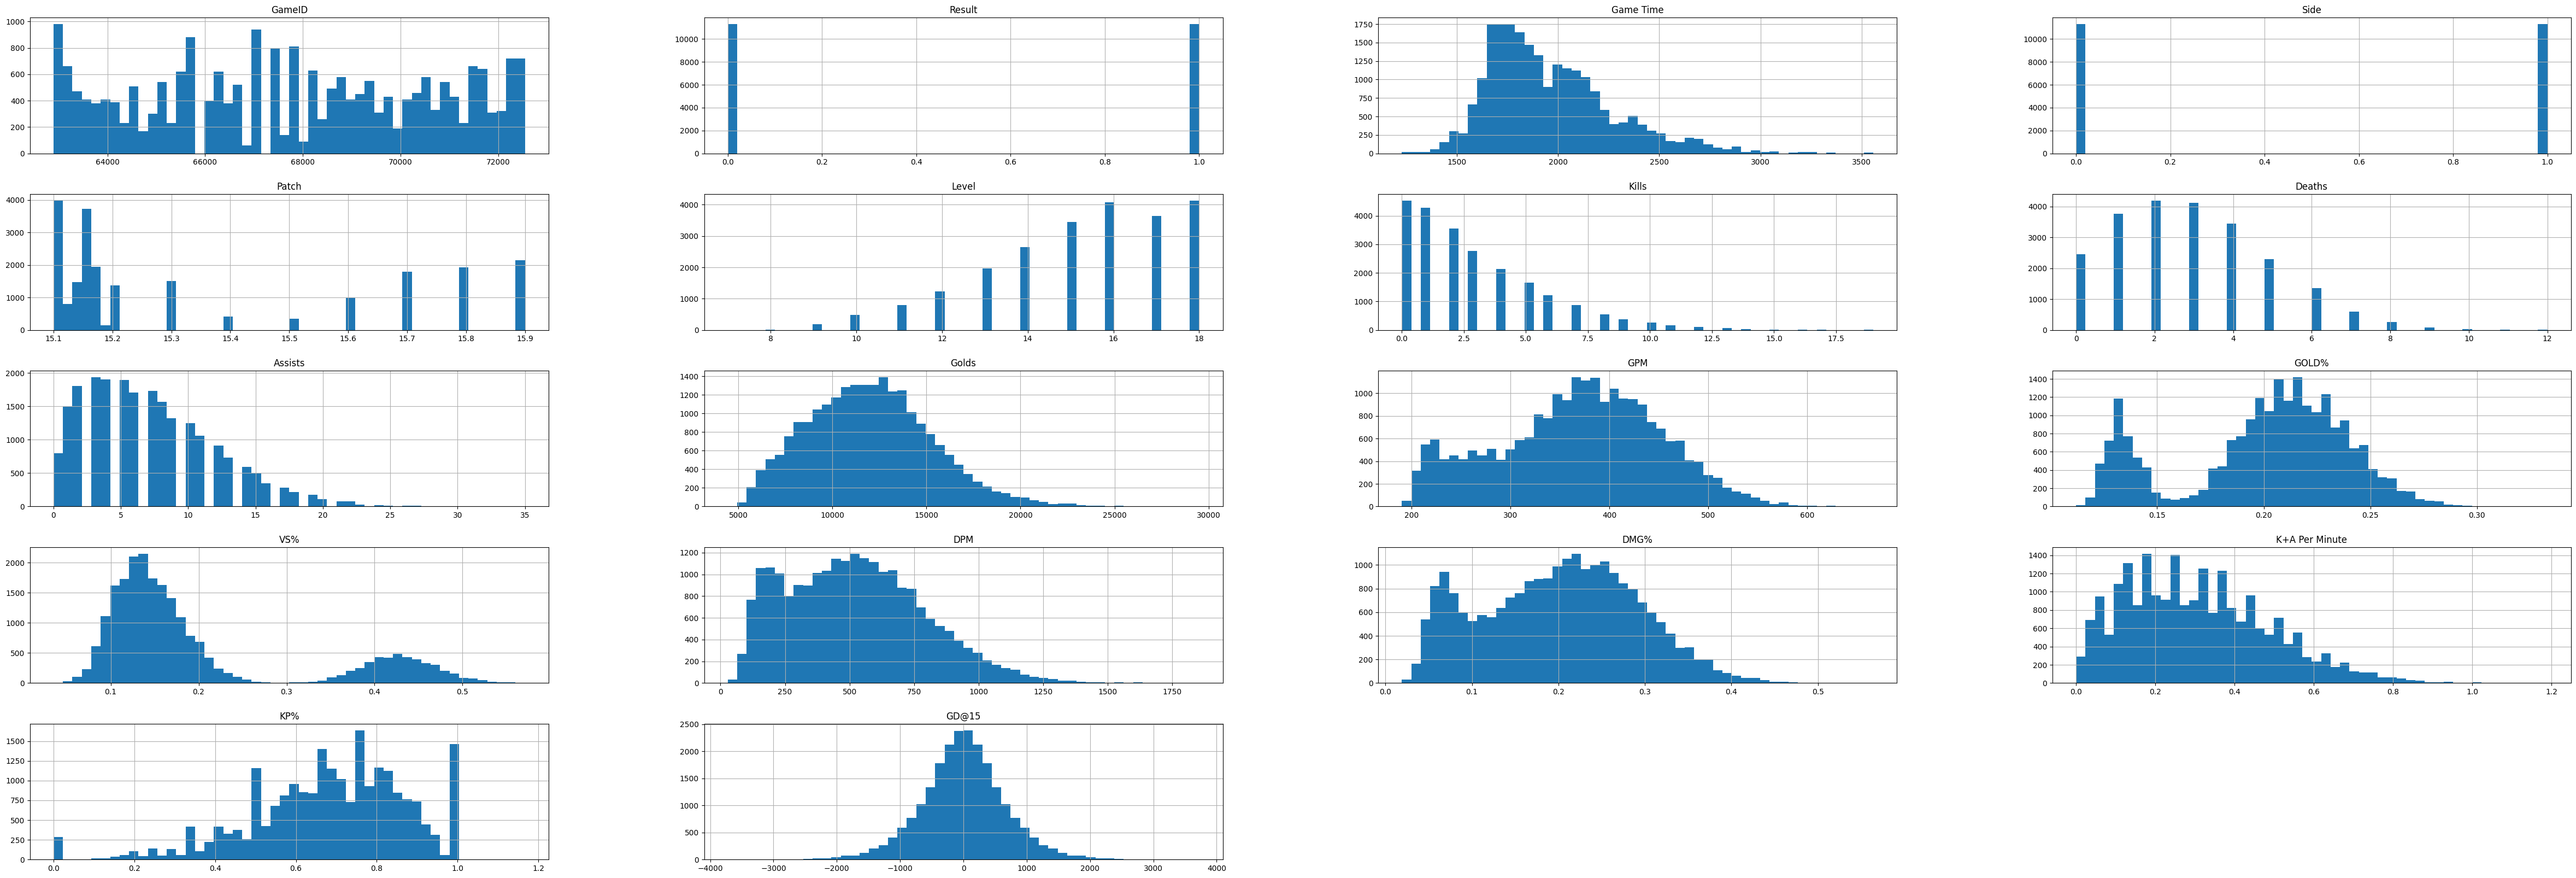

In [23]:
df.hist(bins=50, figsize=(60,20))

In [24]:
df

,GameID,Team,Result,Game Time,Side,Patch,Tournament,Date,Region,Champion,Player,Role,Level,Kills,Deaths,Assists,Golds,GPM,GOLD%,VS%,DPM,DMG%,K+A Per Minute,KP%,GD@15
0,62896,Weibo Gaming,1,2123.0,1,15.10,LPL 2025 Split 1,2025-01-12,CN,Ksante,Breathe,TOP,18.0,4,0,3,14706,416,0.212,0.096,278,0.124,0.20,0.412,-600.0
1,62896,Weibo Gaming,1,2123.0,1,15.10,LPL 2025 Split 1,2025-01-12,CN,Viego,Tian,JUNGLE,17.0,4,0,5,14586,412,0.210,0.165,283,0.126,0.25,0.529,528.0
2,62896,Weibo Gaming,1,2123.0,1,15.10,LPL 2025 Split 1,2025-01-12,CN,Aurora,xiaohu,MID,18.0,5,1,8,15720,444,0.226,0.130,1062,0.474,0.37,0.765,1072.0
3,62896,Weibo Gaming,1,2123.0,1,15.10,LPL 2025 Split 1,2025-01-12,CN,Ashe,Light,ADC,16.0,3,2,6,14688,415,0.211,0.173,441,0.197,0.25,0.529,-199.0
4,62896,Weibo Gaming,1,2123.0,1,15.10,LPL 2025 Split 1,2025-01-12,CN,Braum,Hang,SUPPORT,14.0,1,2,11,9762,276,0.141,0.436,178,0.079,0.34,0.706,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22595,72533,CTBC Flying Oyster,1,2065.0,0,15.17,LCP 2025 Season Finals Playoffs,2025-09-21,WR,Ambessa,Driver,TOP,18.0,4,5,12,15437,449,0.216,0.113,954,0.247,0.46,0.615,197.0
22596,72533,CTBC Flying Oyster,1,2065.0,0,15.17,LCP 2025 Season Finals Playoffs,2025-09-21,WR,Trundle,JunJia,JUNGLE,17.0,2,3,15,13186,383,0.184,0.248,452,0.117,0.49,0.654,-1568.0
22597,72533,CTBC Flying Oyster,1,2065.0,0,15.17,LCP 2025 Season Finals Playoffs,2025-09-21,WR,Akali,HongQ,MID,18.0,12,3,3,16838,489,0.236,0.138,882,0.228,0.44,0.577,1517.0
22598,72533,CTBC Flying Oyster,1,2065.0,0,15.17,LCP 2025 Season Finals Playoffs,2025-09-21,WR,Miss Fortune,Doggo,ADC,17.0,6,1,9,16629,483,0.233,0.154,1093,0.283,0.44,0.577,-93.0


In [25]:
team_stats = df.groupby(["GameID", "Team"], as_index=False).agg({
    "Date": "first",
    "Region": "first",
    "Kills": "sum",
    "Deaths": "sum",
    "Assists": "sum",
    "Result": "first",
    "Game Time": "first",
    "Side": "first",
    "Patch": "first",
    "GD@15": "sum"
})

In [26]:
champions_per_role = df.groupby(["GameID", "Team", "Role"])["Champion"].first().unstack()
champions_per_role.columns = [f"{role}_champion" for role in champions_per_role.columns]

In [27]:
player_per_role = df.groupby(["GameID", "Team", "Role"])["Player"].first().unstack()
player_per_role.columns = [f"{role}_player" for role in player_per_role.columns]

In [28]:
kills_per_role = df.groupby(["GameID", "Team", "Role"])["Kills"].first().unstack()
kills_per_role.columns = [f"{role}_kills" for role in kills_per_role.columns]

In [29]:
assists_per_role = df.groupby(["GameID", "Team", "Role"])["Assists"].first().unstack()
assists_per_role.columns = [f"{role}_assists" for role in assists_per_role.columns]

In [30]:
deaths_per_role = df.groupby(["GameID", "Team", "Role"])["Deaths"].first().unstack()
deaths_per_role.columns = [f"{role}_deaths" for role in deaths_per_role.columns]

In [31]:
kp_per_role = df.groupby(["GameID", "Team", "Role"])["KP%"].first().unstack()
kp_per_role.columns = [f"{role}_kp%" for role in kp_per_role.columns]

In [32]:
dmg_per_role = df.groupby(["GameID", "Team", "Role"])["DMG%"].first().unstack()
dmg_per_role.columns = [f"{role}_dmg%" for role in dmg_per_role.columns]

In [33]:
ka_per_role = df.groupby(["GameID", "Team", "Role"])["K+A Per Minute"].first().unstack()
ka_per_role.columns = [f"{role}_ka_per_minute" for role in ka_per_role.columns]

In [34]:
gd_per_role = df.groupby(["GameID", "Team", "Role"])["GD@15"].first().unstack()
gd_per_role.columns = [f"{role}_gd@15" for role in gd_per_role.columns]

In [35]:
team_stats = (team_stats.merge(champions_per_role, on=["GameID", "Team"], how="left")
             .merge(player_per_role, on=["GameID", "Team"], how="left")
             .merge(kills_per_role, on=["GameID", "Team"], how="left")
             .merge(assists_per_role, on=["GameID", "Team"], how="left")
             .merge(deaths_per_role, on=["GameID", "Team"], how="left")
             .merge(kp_per_role, on=["GameID", "Team"], how="left")
             .merge(dmg_per_role, on=["GameID", "Team"], how="left")
             .merge(ka_per_role, on=["GameID", "Team"], how="left")
             .merge(gd_per_role, on=["GameID", "Team"], how="left")
             )


In [36]:
team_stats

,GameID,Team,Date,Region,Kills,Deaths,Assists,Result,Game Time,Side,Patch,GD@15,ADC_champion,JUNGLE_champion,MID_champion,SUPPORT_champion,TOP_champion,ADC_player,JUNGLE_player,MID_player,SUPPORT_player,TOP_player,ADC_kills,JUNGLE_kills,MID_kills,SUPPORT_kills,TOP_kills,ADC_assists,JUNGLE_assists,MID_assists,SUPPORT_assists,TOP_assists,ADC_deaths,JUNGLE_deaths,MID_deaths,SUPPORT_deaths,TOP_deaths,ADC_kp%,JUNGLE_kp%,MID_kp%,SUPPORT_kp%,TOP_kp%,ADC_dmg%,JUNGLE_dmg%,MID_dmg%,SUPPORT_dmg%,TOP_dmg%,ADC_ka_per_minute,JUNGLE_ka_per_minute,MID_ka_per_minute,SUPPORT_ka_per_minute,TOP_ka_per_minute,ADC_gd@15,JUNGLE_gd@15,MID_gd@15,SUPPORT_gd@15,TOP_gd@15
0,62896,OMG,2025-01-12,CN,5,17,9,0,2123.0,0,15.10,-1051.0,Varus,Nocturne,Orianna,Neeko,Gnar,Starry,Heng,Linfeng,Moham,Hery,2,2,0,0,1,2,1,3,3,0,4,4,3,4,2,0.800,0.600,0.600,0.600,0.200,0.213,0.146,0.231,0.147,0.262,0.11,0.08,0.08,0.08,0.03,199.0,-528.0,-1072.0,-250.0,600.0
1,62896,Weibo Gaming,2025-01-12,CN,17,5,33,1,2123.0,1,15.10,1051.0,Ashe,Viego,Aurora,Braum,Ksante,Light,Tian,xiaohu,Hang,Breathe,3,4,5,1,4,6,5,8,11,3,2,0,1,2,0,0.529,0.529,0.765,0.706,0.412,0.197,0.126,0.474,0.079,0.124,0.25,0.25,0.37,0.34,0.20,-199.0,528.0,1072.0,250.0,-600.0
2,62897,OMG,2025-01-12,CN,11,18,27,0,1952.0,1,15.10,-2888.0,Jhin,Maokai,Ambessa,Rell,Rumble,Starry,Heng,Linfeng,Moham,Hery,0,1,4,0,6,5,7,2,9,4,3,6,4,4,1,0.455,0.727,0.545,0.818,0.909,0.097,0.213,0.243,0.056,0.390,0.15,0.25,0.18,0.28,0.31,-1727.0,197.0,-922.0,-245.0,-191.0
3,62897,Weibo Gaming,2025-01-12,CN,18,11,40,1,1952.0,0,15.10,2888.0,Miss Fortune,Wukong,Viktor,Rakan,Jayce,Light,Tian,xiaohu,Hang,Breathe,4,6,1,2,5,9,6,7,11,7,1,2,3,2,3,0.722,0.667,0.444,0.722,0.667,0.316,0.157,0.306,0.044,0.178,0.40,0.37,0.25,0.40,0.37,1727.0,-197.0,922.0,245.0,191.0
4,62898,OMG,2025-01-12,CN,18,22,40,0,2014.0,1,15.10,2460.0,Ziggs,Zyra,Yone,Leona,Aatrox,Starry,Heng,Linfeng,Moham,Hery,5,6,6,0,1,9,9,4,13,5,3,6,6,3,4,0.778,0.833,0.556,0.722,0.333,0.314,0.285,0.166,0.091,0.144,0.42,0.45,0.30,0.39,0.18,672.0,936.0,178.0,1077.0,-403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,72546,RED Canids,2025-09-21,WR,8,24,21,0,1843.0,0,15.18,-1811.0,Jhin,Skarner,Azir,Bard,Rek,Rabelo,doom,Kaze,frosty,fNb,1,0,1,2,4,4,6,5,4,2,3,6,7,3,5,0.625,0.750,0.750,0.750,0.750,0.261,0.177,0.209,0.171,0.182,0.16,0.20,0.20,0.20,0.20,-709.0,-369.0,-436.0,-184.0,-113.0
4514,72547,100 Thieves,2025-09-21,WR,31,22,73,1,2213.0,0,15.18,-1101.0,Senna,Pantheon,Sylas,Rell,Rumble,FBI,River,Quid,Eyla,Dhokla,4,7,15,1,4,20,12,8,18,15,5,5,1,4,7,0.774,0.613,0.742,0.613,0.613,0.255,0.176,0.288,0.061,0.221,0.65,0.52,0.62,0.52,0.52,462.0,-1024.0,-282.0,-511.0,254.0
4515,72547,RED Canids,2025-09-21,WR,22,31,57,0,2213.0,1,15.18,1101.0,Lucian,Xin Zhao,Orianna,Braum,Galio,Rabelo,doom,Kaze,frosty,fNb,4,4,4,2,8,10,10,13,18,6,9,7,6,5,4,0.636,0.636,0.773,0.909,0.636,0.221,0.204,0.219,0.114,0.243,0.38,0.38,0.46,0.54,0.38,-462.0,1024.0,282.0,511.0,-254.0
4516,72548,100 Thieves,2025-09-21,WR,18,8,39,1,1841.0,1,15.18,2094.0,Ziggs,Lee Sin,Cassiopeia,Alistar,Sion,FBI,River,Quid,Eyla,Dhokla,6,2,6,1,3,7,8,7,11,6,0,3,0,3,2,0.722,0.556,0.722,0.667,0.500,0.369,0.102,0.307,0.059,0.163,0.42,0.33,0.42,0.39,0.29,-761.0,501.0,717.0,233.0,1404.0


In [37]:
team_stats.to_csv("combined_team_match_history.csv", index = False)